In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


In [ ]:
train_data = pd.read_csv("./HR_Employee_Attrition.csv")
#sample_submission = pd.read_csv("data/sample_submission.csv")

In [ ]:
#데이터 형태 확인
print(train_data.shape)
print(train_data.dtypes)

#결측치 확인
print(train_data.isnull().sum())

#이상치 확인
train_data.describe()



(1470, 35)
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWork

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# 결측값 처리 이때는 결측값이 없기에 패스
train_data = train_data.fillna(method = 'bfill')

print(train_data.isnull().sum())

In [ ]:
#이상치 처리


In [ ]:
#수치형 데이터와 카테고리형 데이터 분리

numeric_feature = train_data.columns[(train_data.dtypes==int) | (train_data.dtypes== float)]
categorical_feature = train_data.columns[train_data.dtypes=='O']

print("수치형 데이터는 다음과 같습니다. \n", list(numeric_feature))
print("카테고리형 데이터는 다음과 같습니다. \n", list(categorical_feature))

수치형 데이터는 다음과 같습니다. 
 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
카테고리형 데이터는 다음과 같습니다. 
 ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


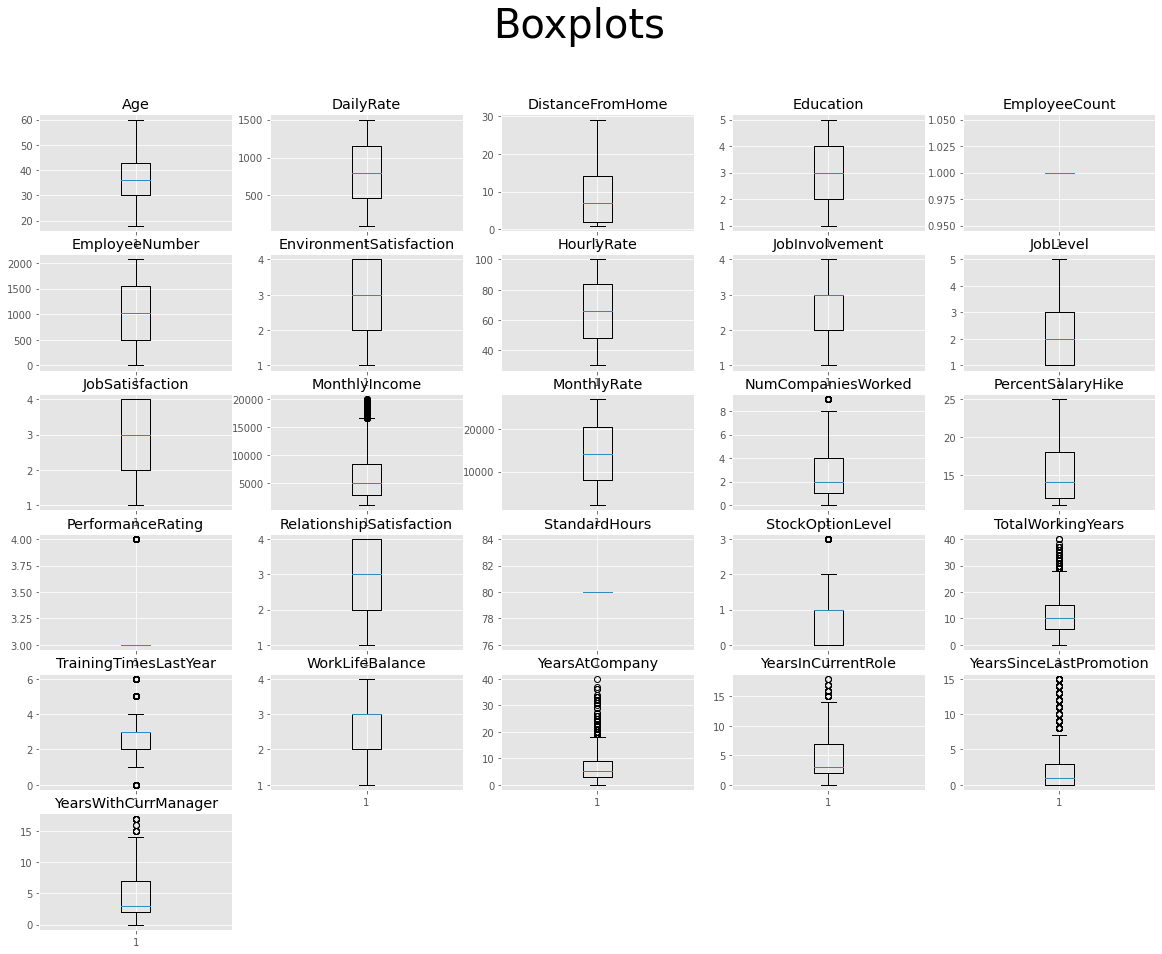

In [ ]:
#수치형 데이터 시각화

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_feature

# Boxplot 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)

for i in range(len(feature)):
    plt.subplot(6,5,i+1) 
    plt.title(feature[i])
    plt.boxplot(train_data[feature[i]])
plt.show()

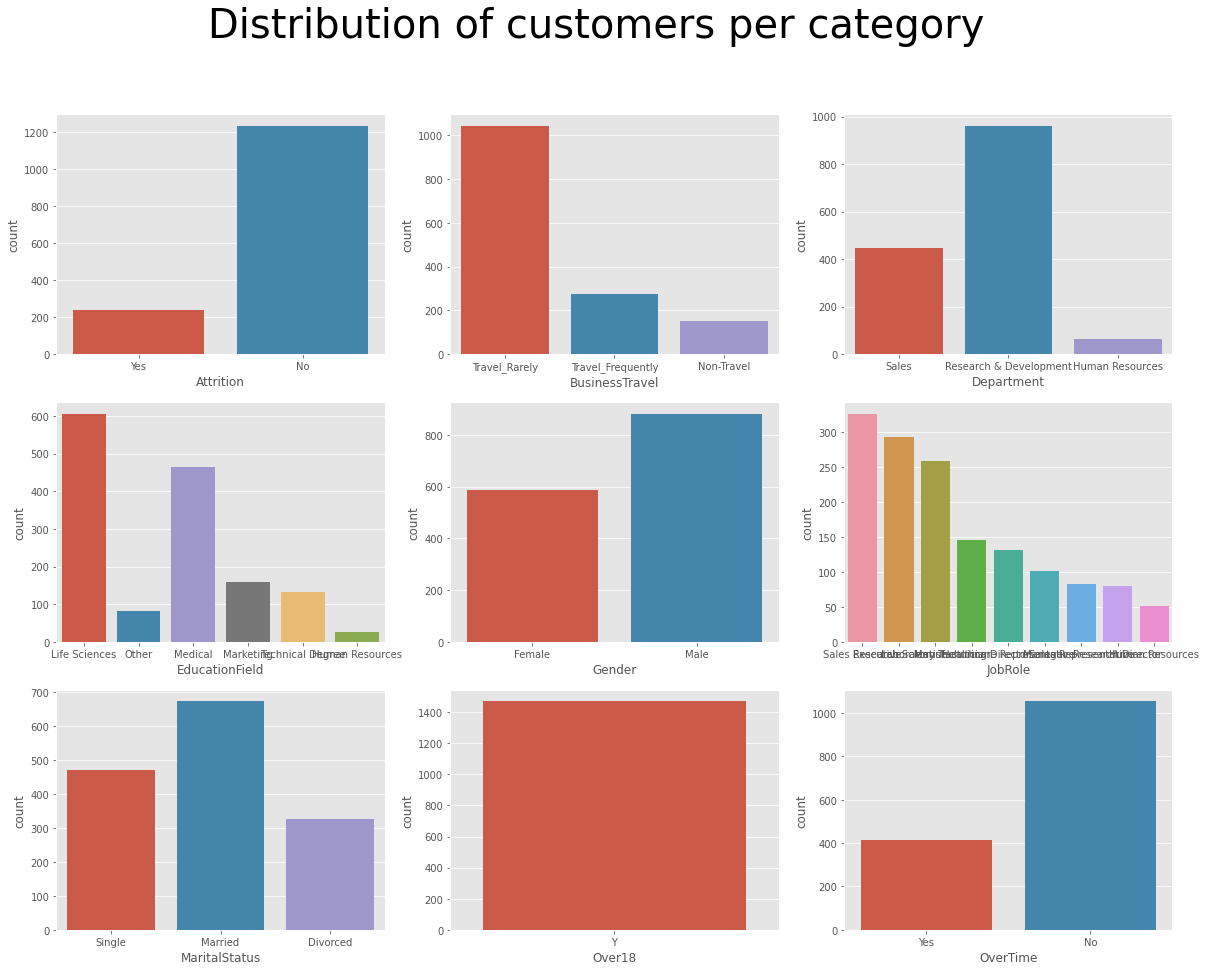

In [ ]:
#카테고리형 데이터 시각화
import seaborn as sns
fig, axes = plt.subplots(3, 3, figsize=(20,15))
fig.suptitle('Distribution of customers per category', fontsize=40)

for ax, feature in zip(axes.flatten(), categorical_feature):
    sns.countplot(data = train_data, x = feature, ax=ax)
plt.show()

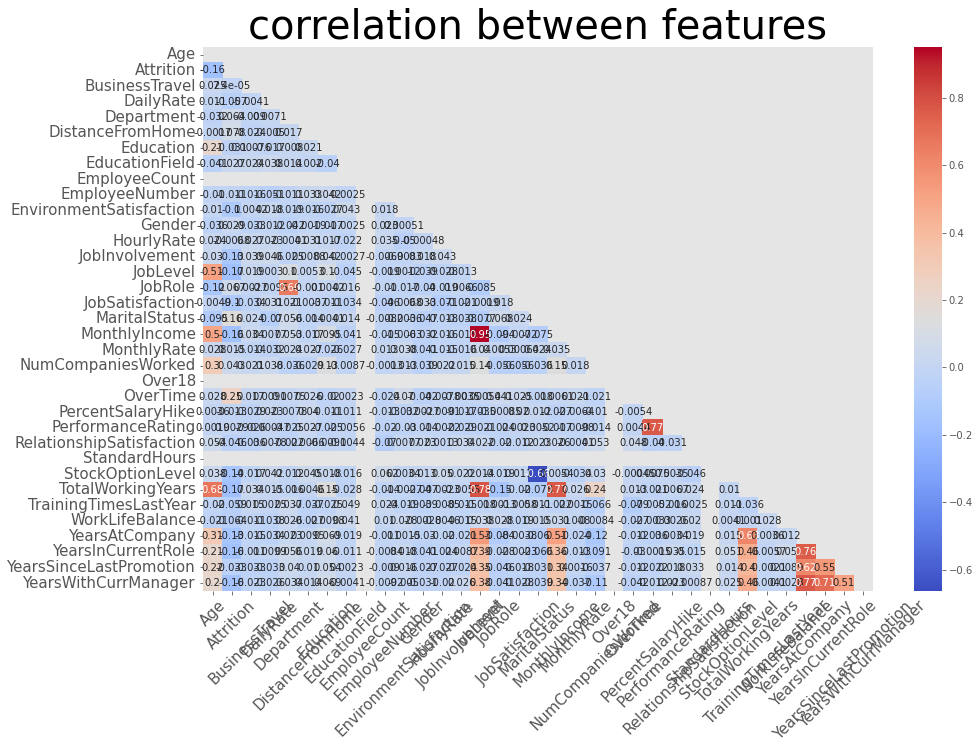

In [ ]:
#상관관계 시각화


from sklearn.preprocessing import LabelEncoder

corr_df = train_data.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()


In [ ]:
s28 = heat_table.unstack()
df_temp28 = pd.DataFrame(s28['YearsWithCurrManager'].sort_values(ascending=False), columns=['YearsWithCurrManager'])
df_temp28.style.background_gradient(cmap='viridis')

,YearsWithCurrManager
YearsWithCurrManager,1.000000
YearsAtCompany,0.769212
YearsInCurrentRole,0.714365
YearsSinceLastPromotion,0.510224
TotalWorkingYears,0.459188
JobLevel,0.375281
MonthlyIncome,0.344079
Age,0.202089
Education,0.069065
Department,0.034282


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


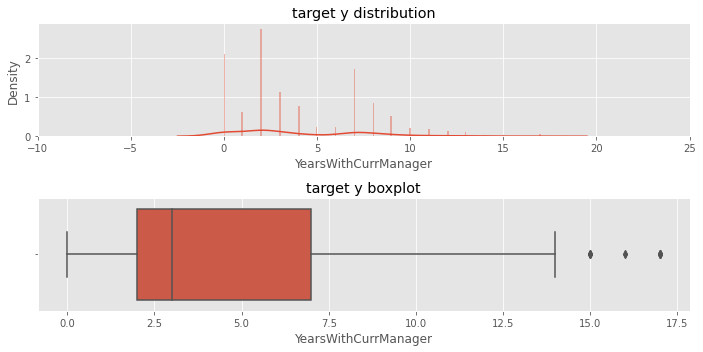

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(2,1,1)
sns.distplot(train_data.YearsWithCurrManager,bins=200)
plt.xlim(-10,25)
plt.title('target y distribution')

plt.subplot(2,1,2)
sns.boxplot(train_data.YearsWithCurrManager)
plt.title('target y boxplot')
plt.tight_layout()
plt.show()

In [ ]:
train_data['time'] = train_data.TotalWorkingYears + train_data.TrainingTimesLastYear


In [ ]:
df['Age'].min()
df['Age'].max()
def age(df):
  a=df['Age']
  if a >= 18 and a < 20:
    return 1
  elif a >= 20 and a < 30:
    return 2
  elif a >= 30 and a < 40:
    return 3
  elif a >= 40 and a < 50:
    return 4
  elif a >= 50 and a < 60:
    return 5
  else:
    return 6

df['연령대']=df.apply(age, axis=1)